The dataset, mtcars is an in-built data set about cars which contains 32 observations and 11 variables. 
https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html
The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). 

| Sl No | Variable | Description |
| --- | ---------------- | -----------------------------------|
| 1 | mpg | Miles/(US) gallon | 
| 2 | cyl | Number of cylinders | 
| 3 | disp | Displacement (cu.in.) | 
| 4 | hp | Gross horsepower | 
| 5 | drat | Rear axle ratio | 
| 6 | wt | Weight (1000 lbs) | 
| 7 | qsec | 1/4 mile time | 
| 8 | vs | Engine (0 = V-shaped, 1 = straight) | 
| 9 | am | Transmission (0 = automatic, 1 = manual) | 
| 10 | gear | Number of forward gears | 
| 11 | carb | Number of carburetors | 

In [1]:
import pandas                   as pd
import numpy                    as np
import matplotlib.pyplot        as plt
import seaborn                  as sns
import statsmodels.api          as sm
import statsmodels.stats.api    as sms
from   statsmodels.compat       import lzip
from   statsmodels.stats        import diagnostic as diag


from  statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
cars = sm.datasets.get_rdataset('mtcars').data
print(cars.head(4).T)
print(cars.info())

      Mazda RX4  Mazda RX4 Wag  Datsun 710  Hornet 4 Drive
mpg       21.00         21.000       22.80          21.400
cyl        6.00          6.000        4.00           6.000
disp     160.00        160.000      108.00         258.000
hp       110.00        110.000       93.00         110.000
drat       3.90          3.900        3.85           3.080
wt         2.62          2.875        2.32           3.215
qsec      16.46         17.020       18.61          19.440
vs         0.00          0.000        1.00           1.000
am         1.00          1.000        1.00           0.000
gear       4.00          4.000        4.00           3.000
carb       4.00          4.000        1.00           1.000
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non

In [3]:
feature_names = ['cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
X  =  cars.loc[:,feature_names]
y  =  cars.mpg

In [4]:
cars.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

### No missing values

In [5]:
cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

We are not interested in the variables that have least variance < 3 or zero variance.

In [6]:
X         =  cars[['disp', 'cyl','hp', 'qsec']]
y         =  cars['mpg']

In [7]:
X_            = sm.add_constant(X, has_constant= 'add') # Add an intercept to our model
model         = sm.OLS(y, X_).fit() ## OLS(output, input)
predictions   = model.predict(X_)

## Print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     24.59
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.15e-08
Time:                        19:20:08   Log-Likelihood:                -77.812
No. Observations:                  32   AIC:                             165.6
Df Residuals:                      27   BIC:                             173.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.2352     10.699      4.602      0.000      27.282      71.189
disp          -0.0119      0.011     -1.055      0.301      -0.035       0.011
cyl           -1.6137      0.826     -1.953      0.061      -3.309       0.082
hp            -0.0288      0.017     -1.659      0.109      -0.065       0.007
qsec          -0.6827      0.471     -1.448      0.159      -1.650       0.285
==============================================================================
Omnibus:                        4.461   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                3.519
Skew:                           0.811   Prob(JB):                        0.172
Kurtosis:                       3.092   Cond. No.                     6.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Check assumptions
### 1) No outliers

Firstly we try to get the studentized residuals using get_influence( ). 

In [8]:
influence     = model.get_influence()  
resid_student = influence.resid_studentized_external
print(resid_student)

[-0.80168604 -0.64906313 -1.16454458  0.46665785  1.174692   -0.68286156
  0.04673494 -0.41818185  0.02986542 -0.79707089 -1.16789736  0.14990053
  0.52113817 -0.1317336  -0.81587213 -0.78152233  0.77688407  2.135197
  0.94420056  2.96693418 -1.21755151 -0.42739365 -0.48739793 -0.4449052
  1.6082485   0.09117305 -0.49794136  1.31305912  0.41990687 -0.90729883
  0.9143045  -1.47959995]


From the above list, we do not find any value above 3. So there is no outlier. 

### No outlier assumption is satisfied.

### 2) Constant variance

Checking heteroscedasticity Using Goldfeld Quandt we test for heteroscedasticity.

* Null Hypothesis: Error terms are homoscedastic
* Alternative Hypothesis: Error terms are heteroscedastic.

In [9]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 3.8963964956266275), ('p-value', 0.01660790822023686)]

The p-value is < 0.05 and it is 0.001 hence we can say that the residuals do not have constant variance. 

## Constant variance assumption is not satisfied.

### 3) No autocorrelation

#### Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.

####  Null Hypothesis: Autocorrelation is absent.
#### Alternative Hypothesis: Autocorrelation is present.

In [10]:
diag.acorr_ljungbox(model.resid, lags = 1) 

(array([0.22335757]), array([0.63649344]))

Since p-value of 0.6365 > 0.05, we can accept the null hypothesis and can say that autocorrelation is absent.

## No auto correlation assumption is satisfied

### 4) Normality of the residuals

#### We use Jarque-Bera test  from scipy library to check the normality of residuals.

Most tests for normality are based either on comparing the empirical cumulative distribution with the theoretical normal cumulative distribution (Kolmogorov-Smirnov, Anderson-Darling, Chi-Square) or empirical quantiles with the theoretical normal quantiles (Wilk-Shapiro). 

The Jarque-Bera test is based on the sample skewness and sample kurtosis. 


#### Null Hypothesis: The residuals are normally distributed.

####  Alternative Hypothesis: The residuals are not normally distributed.

We find from the earlier summary table, that Prob(JB) = 0.172
Since p value of 0.172 > 0.05, we do not have evidence to reject the null hypothesis and thus conclude that the residuals are normally distributed.

## Normality of the residuals assumption is satisfied.

 ### 5) Linearity

The residual vs fitted values plot is used to check for constant variance and linearity, and to identify potential outliers in the data.

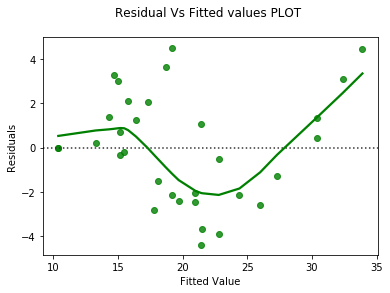

In [11]:
residuals  =  model.resid
# Plot the residuals after fitting a linear model
ax         = sns.residplot(y, residuals, lowess = True, color = "g")

ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
plt.show()

The residual plot indicates that the model’s residuals are restricting to mean of zero to a great extent exhibiting linearity.

### 6) No multi-collinearity

This assumption is not required for Lasso or Ridge regression techniques.

In [12]:
vif = [variance_inflation_factor(X.values, j) for j in range(X.shape[1])]

In [13]:
print(lzip(vif, feature_names))

[(21.925176669877555, 'cyl'), (74.67721308174863, 'disp'), (20.75329623006716, 'hp'), (14.37250462188475, 'drat')]
